In [1]:
from pathlib import Path
import sys
papylio_path = Path.cwd()
for i in range(20):
    papylio_path = papylio_path.parent
    if papylio_path.name == 'papylio':
        break
        
sys.path.append(str(papylio_path))
import papylio as pp

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

experiment_path = papylio_path / 'tests' / 'integration' / 'data' / 'Papylio example dataset - analyzed'
experiment_path

exp = pp.Experiment(experiment_path)
file = exp.files.select('HJ', 'name')[0]

Import files: 100%|██████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 3419.32it/s]



Initialize experiment: 
C:\Users\user\surfdrive\Promotie\Code\Python\papylio\tests\integration\data\Papylio example dataset - analyzed


# Maximum Likelihood Estimation (MLE)

MLE is a method to estimate the parameters of a probability distribution by maximizing the likelihood function, which quantifies how well a given model explains the observed data. As the observations are considered independent the likelihood of a model is given by

$$
\mathcal{L}(\theta|t)=p_{\theta}(t) = \prod_{i=1}^{N}p(t_i| \theta)
$$

It is thus the product of the probabilities for getting each $t_i$ out of $N$ observations given a model $\theta$. 
To find the optimal model we maximize the likelihood function:

$$
\underset{\theta}{\arg\max} \, \mathcal{L}(\theta|t)
$$

However, for maximization it is more convenient to use the loglikelihood, which gives the same maximum value:

$$
\underset{\theta}{\arg\max} \, \mathcal{L}(\theta|t) = \underset{\theta}{\arg\max} \, \mathcal{l}(\theta|t)
$$

where

$$
\mathcal{l}(\theta|t) = \ln\left(\mathcal{L}(\theta|t)\right) = \ln\left(\prod_{i=1}^{N}p(t_i| \theta)\right) = \sum_{n=1}^{N}\ln p(t_i| \theta)
$$

or equivalently we minimize 

$$
\underset{\theta}{\arg\min} \, \left( -\mathcal{l}(\theta|t) \right) = \underset{\theta}{\arg\min} \, \left( -\sum_{n=1}^{N}\ln p(t_i| \theta) \right)
$$

the negative loglikelihood.

For dwell time fitting the probability distribution is a single- or multi-component exponential distribution.

## Truncation

In practical experiments, dwell times are often subject to truncation effects, which can bias maximum likelihood estimates if not accounted for. In single-molecule experiments, truncation occurs due to finite observation windows: generally we can not observe events faster than our time resolution and longer than our total measurement time.

The importance of accounting for truncation effects is shown below, where we compare maximum likelihood estimation using an untruncated probality density function (PDF) with one that is truncated with half the frame interval.

C:\Users\user\surfdrive\Promotie\Code\Python\papylio\papylio\analysis\dwell_time_analysis.py:273: RuntimeWarning: invalid value encountered in log
  loglikelihood = np.sum(np.log(probability_density))


Text(0.5, 0.98, 'No truncation')

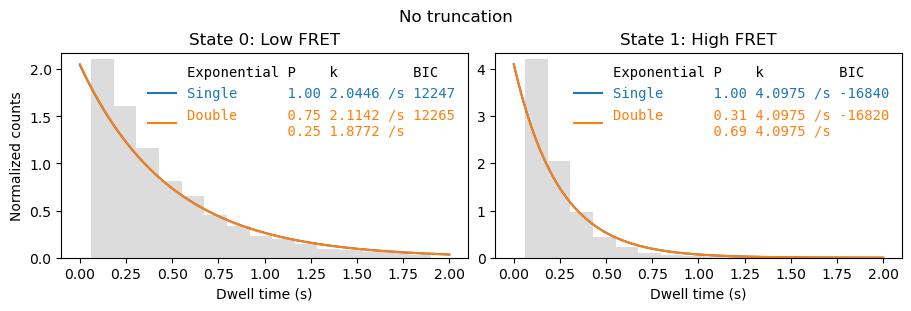

In [2]:
fig, axes = plt.subplots(1,2, figsize=(9,3), layout='constrained')
file.analyze_dwells(method='mle', number_of_exponentials=[1,2], state_names={0: 'Low FRET',  1:'High FRET'}, truncation=(0,np.inf),
                       plot=True, plot_dwell_analysis_kwargs=dict(plot_range=(0,2), axes=axes))
fig.suptitle('No truncation')

C:\Users\user\surfdrive\Promotie\Code\Python\papylio\papylio\analysis\dwell_time_analysis.py:273: RuntimeWarning: invalid value encountered in log
  loglikelihood = np.sum(np.log(probability_density))


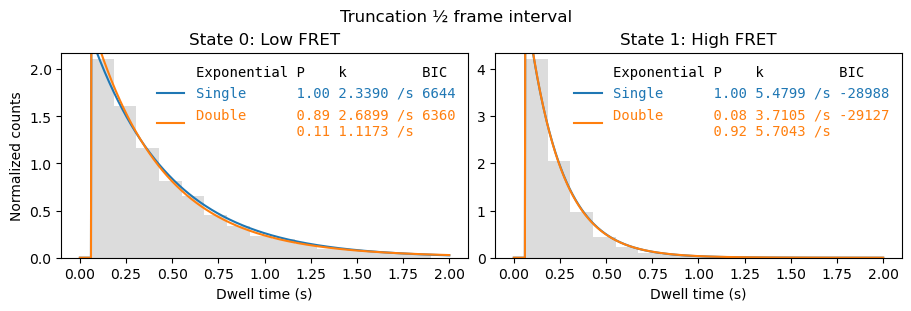

In [3]:
fig, axes = plt.subplots(1,2, figsize=(9,3), layout='constrained')
file.analyze_dwells(method='mle', number_of_exponentials=[1,2], state_names={0: 'Low FRET',  1:'High FRET'}, 
                    truncation=(file.cycle_time/2, np.inf),
                    plot=True, plot_dwell_analysis_kwargs=dict(plot_range=(0,2), axes=axes))
_ = fig.suptitle('Truncation ½ frame interval')

As shown by the comparison, using a truncated PDF is most important when the rates are of the same order of magnitude as the frame rate. For processes much slower than the frame rate, the effects will be smaller. The precise truncation bound is difficult to determine and will depend on the ability to detect small changes in the signal. Here we made the assumption that events smaller than half the frame interval are not detected.

Note that using the lower truncation value as a free fit parameter does not work well for MLE, as it then chooses the value of the shortest dwell times. Hence, for MLE this feature is turned off by default.

C:\Users\user\surfdrive\Promotie\Code\Python\papylio\papylio\analysis\dwell_time_analysis.py:273: RuntimeWarning: invalid value encountered in log
  loglikelihood = np.sum(np.log(probability_density))


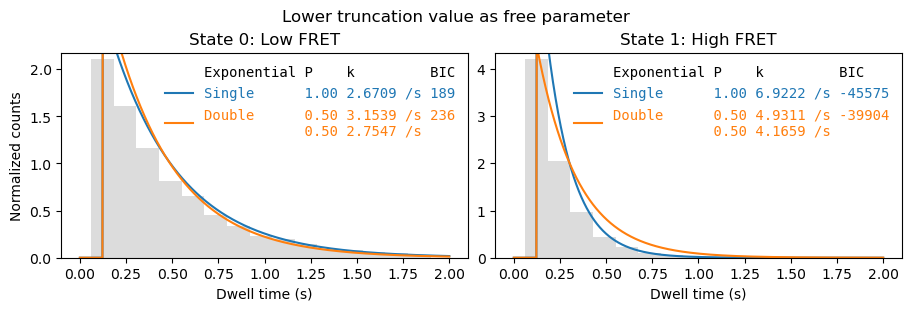

In [4]:
fig, axes = plt.subplots(1,2, figsize=(9,3), layout='constrained')
file.analyze_dwells(method='mle', number_of_exponentials=[1,2], state_names={0: 'Low FRET',  1:'High FRET'}, 
                    truncation=(file.cycle_time/2, np.inf), 
                    fit_dwell_times_kwargs=dict(free_truncation_min=True), 
                    plot=True, plot_dwell_analysis_kwargs=dict(plot_range=(0,2), axes=axes))
_ = fig.suptitle('Lower truncation value as free parameter')